In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [14]:
X = X[y < 2 ,: 2]
y = y[y < 2]
X_train,X_test,y_train,y_test = train_test_split(X,y)

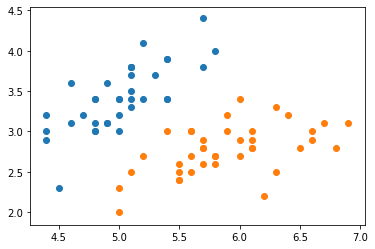

In [16]:
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1])
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1])
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_stand = std_scaler.transform(X_train)
X_test_stand = std_scaler.transform(X_test)

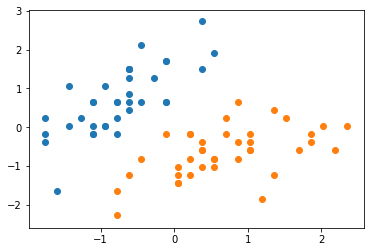

In [20]:
plt.scatter(X_train_stand[y_train == 0,0],X_train_stand[y_train == 0,1])
plt.scatter(X_train_stand[y_train == 1,0],X_train_stand[y_train == 1,1])
plt.show()

In [21]:
from sklearn.svm import LinearSVC

In [82]:
svc1 = LinearSVC(C=1e-2)
svc1.fit(X_train_stand,y_train)

svc2 = LinearSVC(C=1)
svc2.fit(X_train_stand,y_train)

svc3 = LinearSVC(C=1e8)
svc3.fit(X_train_stand,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [63]:
def plotLine(coef_,intercept_,plt,label=None):
    x_list = []
    y_list = []
    c_0 = coef_[0][0]
    c_1 = coef_[0][1]
    i = intercept_
    for it in np.linspace(-2,2,100):
        x_0 = it
        x_1 = (0 - i - c_0*x_0)/(c_1)
        x_list.append(x_0)
        y_list.append(x_1)
    plt.plot(x_list,y_list,label=label)

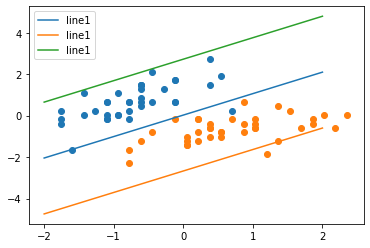

In [83]:
plt.scatter(X_train_stand[y_train == 0,0],X_train_stand[y_train == 0,1])
plt.scatter(X_train_stand[y_train == 1,0],X_train_stand[y_train == 1,1])

plotLine(svc1.coef_,svc1.intercept_,plt,"line1")
#plotLine(svc2.coef_,svc2.intercept_,plt,"line2")
#plotLine(svc3.coef_,svc3.intercept_,plt,"line3")

plotLine(svc1.coef_,svc1.intercept_-1,plt,"line1")
#plotLine(svc2.coef_,svc2.intercept_-1,plt,"line2")
#plotLine(svc3.coef_,svc3.intercept_-1,plt,"line3")

plotLine(svc1.coef_,svc1.intercept_+1,plt,"line1")
#plotLine(svc2.coef_,svc2.intercept_+1,plt,"line2")
#plotLine(svc3.coef_,svc3.intercept_+1,plt,"line3")

plt.legend()
plt.show()

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1])